In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import torch
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/MLLAB/Dataset-SA.csv')

In [ ]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
df.shape

(205052, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [ ]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


In [ ]:
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,24664
Summary,11
Sentiment,0


In [ ]:
df.dropna(subset=['Review'], inplace=True)
df.fillna(value={'Summary': "0"}, inplace=True)

In [ ]:
reviews = df['Review'].value_counts().sort_values(ascending=False)

In [ ]:
reviews[:10]

,count
Review,
wonderful,9016
not specified,8351
brilliant,5643
awesome,5636
great product,5622
classy product,5602
perfect product!,5600
worth every penny,5599
simply awesome,5595


In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
positive,147176
negative,24401
neutral,8811


In [ ]:
df['Rate'].value_counts()

,count
Rate,
5,105647
4,36969
1,18294
3,14024
2,5451
"Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)",1
Bajaj DX 2 L/W Dry Iron,1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise),1


In [ ]:
df.drop(df.loc[~df['Rate'].isin(["1","2","3","4","5"])].index, inplace=True)
df["Rate"].value_counts()

,count
Rate,
5,105647
4,36969
1,18294
3,14024
2,5451


In [ ]:
df[df["Rate"]>"4"].Sentiment.value_counts()

,count
Sentiment,
positive,102823
neutral,2039
negative,785


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
english_stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['Review'][0:10]

,Review
0,super!
1,awesome
2,fair
3,useless product
4,fair
5,awesome
6,highly recommended
7,nice
8,unsatisfactory
9,worth the money


In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
import numpy as np
from nltk.corpus import stopwords
# Clean the text data
def clean_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stopwords.words("english")]
    text = " ".join(text)
    return text

df["Summary"] = df["Summary"].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow price amazing ...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,quality good power air decent,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,bad product fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,nice fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Convert text data to numerical data
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(df["Summary"].values)

maxlen = 30
X = tokenizer.texts_to_sequences(df["Summary"].values)
X_padded = np.zeros((len(X), maxlen))

for i, seq in enumerate(X):
    if len(seq) > maxlen:
        seq = seq[:maxlen]
    X_padded[i, :len(seq)] = seq

y = pd.get_dummies(df["Sentiment"]).values

**Text Preprocessing**

In [4]:
df=df.dropna(subset=['Summary']) #drop null values based on Summary column

In [5]:
from nltk.tokenize import word_tokenize,sent_tokenize

df['Summary']=df['Summary'].apply(lambda x: x.strip()) # Remove the unimportant commands

In [6]:
!pip install nltk
import nltk

# Download the required resource
nltk.download('punkt_tab')

# Now you can use the word_tokenize function
from nltk.tokenize import word_tokenize

df['words'] = df['Summary'].apply(word_tokenize)  # Split the word and stored into list

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df

,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,"[great, cooler, excellent, air, flow, and, for..."
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,"[best, budget, 2, fit, cooler, nice, cooling]"
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,"[the, quality, is, good, but, the, power, of, ..."
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,"[very, bad, product, its, a, only, a, fan]"
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,"[ok, ok, product]"
...,...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive,"[good, product]"
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive,[nice]
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive,"[very, nice, and, fast, delivery]"
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive,"[awesome, product]"


Lowercase

In [7]:
df['words']=[[word.lower() for word in sentence]for sentence in df['words']] # Convert the all words into smaller case

In [ ]:
df.head(5)

,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,"[great, cooler, excellent, air, flow, and, for..."
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,"[best, budget, 2, fit, cooler, nice, cooling]"
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,"[the, quality, is, good, but, the, power, of, ..."
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,"[very, bad, product, its, a, only, a, fan]"
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,"[ok, ok, product]"


Stop word Removal

In [8]:
from nltk.corpus import stopwords #to remove stop words like is ,of ,and etc...
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop_words=set(stopwords.words('english'))
def stopword(sentence):
    return [word for word in sentence if word not in stop_words]

df['words']=df['words'].apply(stopword)

In [ ]:
df.head(5)

,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,"[great, cooler, excellent, air, flow, price, a..."
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,"[best, budget, 2, fit, cooler, nice, cooling]"
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,"[quality, good, power, air, decent]"
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,"[bad, product, fan]"
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,"[ok, ok, product]"


Stemming

In [10]:
from nltk.stem import PorterStemmer  # to change the word into it's base word.Example eating = eat,formality=formalti
stemmer=PorterStemmer()

def stemming_word(row):
    return [stemmer.stem(word) for word in row]

df['words']=df['words'].apply(stemming_word)

In [11]:
dict={'positive':1,'neutral':2,'negative':3} # convert sentiment column into numeric column
df['Sentiment']=df['Sentiment'].map(dict)

In [13]:
df['Sentiment'].value_counts()

,count
Sentiment,
1,166575
3,28232
2,10234


(array([34974., 21052., 31437., 15662., 32022., 13218.,  8511.,  9053.,
         6813.,  7643.]),
 array([  0. ,  47.5,  95. , 142.5, 190. , 237.5, 285. , 332.5, 380. ,
        427.5, 475. ]),
 <BarContainer object of 10 artists>)

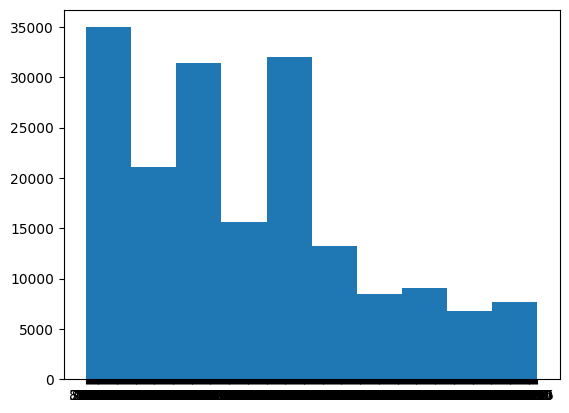

In [ ]:
plt.hist(df['product_price'])

(array([105647.,      0.,  14024.,      0.,      0.,  18294.,      0.,
         36969.,      0.,   5451.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

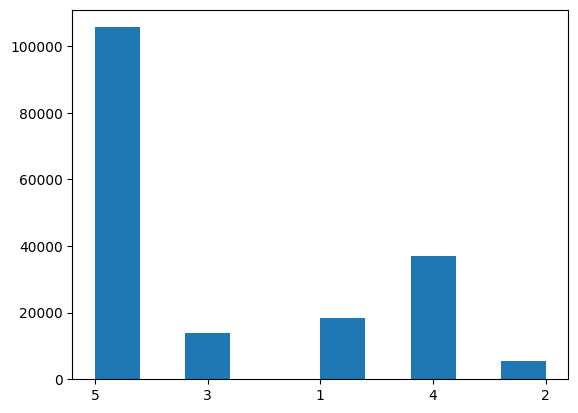

In [ ]:
plt.hist(df['Rate'])

In [ ]:
ratings = df["Rate"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figsize = (10, 5)
figure = px.pie(df,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

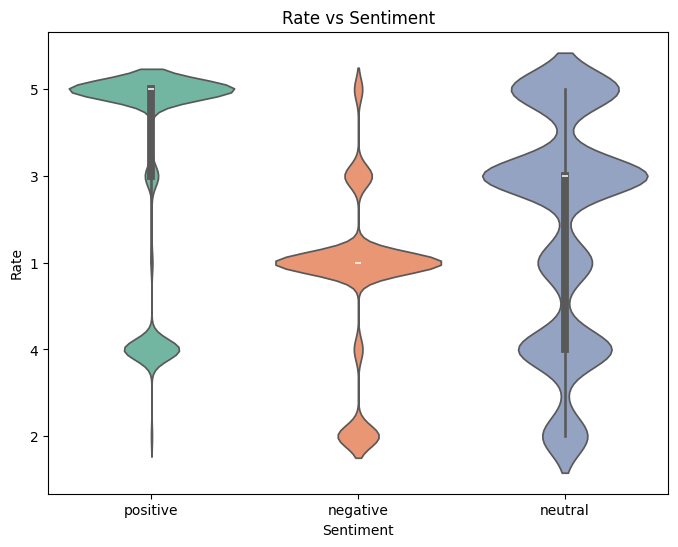

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Sentiment'], y=df['Rate'], palette='Set2')
plt.title('Rate vs Sentiment')
plt.show()

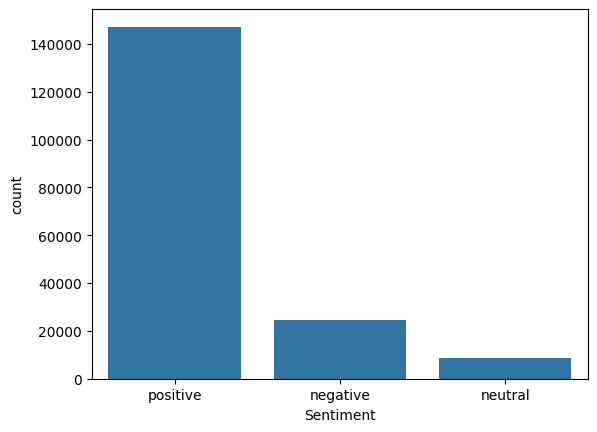

In [ ]:
ax = sns.countplot(x='Sentiment',data=df)

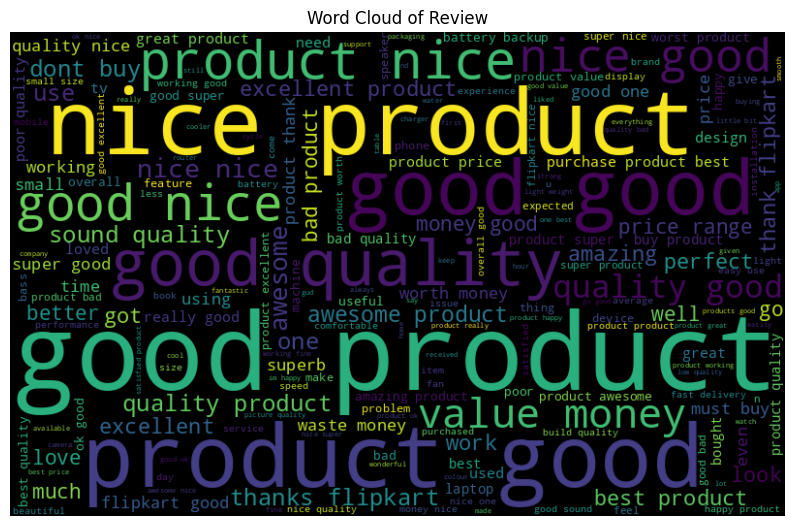

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = " ".join(df["Summary"].values)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Review")
plt.show()

**Sentiment Analysis... (Optional)**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]
df = df[["Review", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


            Review  Positive  Negative  Neutral Sentiment
0            super       1.0     0.000    0.000  positive
1          awesome       1.0     0.000    0.000  positive
2             fair       1.0     0.000    0.000  positive
3  useless product       0.0     0.737    0.263  negative
4             fair       1.0     0.000    0.000  positive


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Reduce dataset size (for faster testing)
df = df.sample(frac=0.1, random_state=42)

# Prepare the data
df = df.dropna(subset=['Summary'])
X = df['Summary']
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer with feature limit
vectorizer = CountVectorizer(max_features=5000, max_df=0.8, stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Define a dictionary with optimized models
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42, n_jobs=-1),
    "SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, solver='liblinear')
}

# Loop through the models, train them, and evaluate them
for model_name, model in models.items():
    print(f"Training model: {model_name}")
    model.fit(X_train_counts, y_train)
    y_pred = model.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy}")
    print(classification_report(y_test, y_pred))





Training model: Naive Bayes
Accuracy for Naive Bayes: 0.8863636363636364
              precision    recall  f1-score   support

    negative       0.82      0.64      0.72       493
     neutral       0.57      0.06      0.12       187
    positive       0.90      0.98      0.94      2928

    accuracy                           0.89      3608
   macro avg       0.76      0.56      0.59      3608
weighted avg       0.87      0.89      0.86      3608

Training model: Random Forest
Accuracy for Random Forest: 0.8118070953436807
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00       493
     neutral       0.00      0.00      0.00       187
    positive       0.81      1.00      0.90      2928

    accuracy                           0.81      3608
   macro avg       0.60      0.33      0.30      3608
weighted avg       0.80      0.81      0.73      3608

Training model: SVM
Accuracy for SVM: 0.8985587583148559
              precision    reca

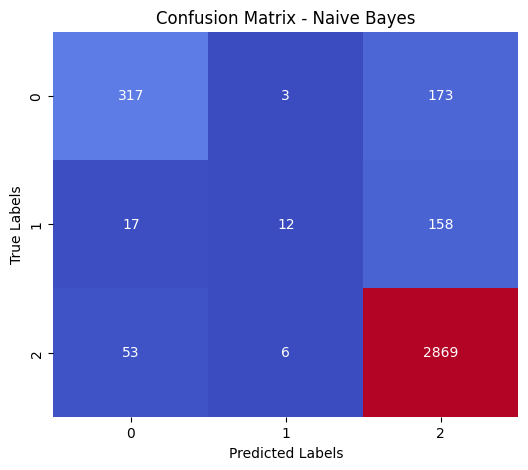

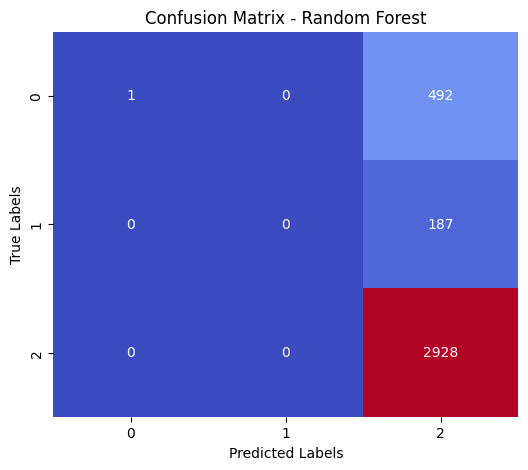

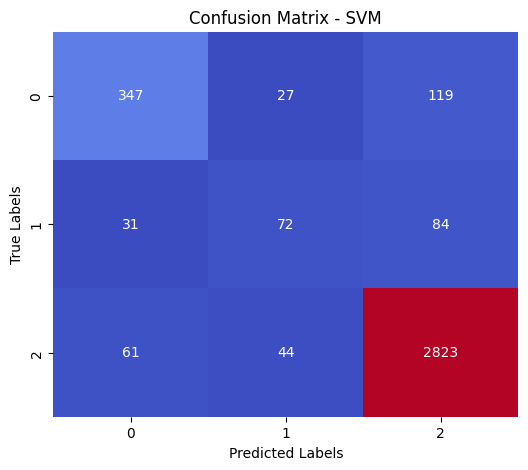

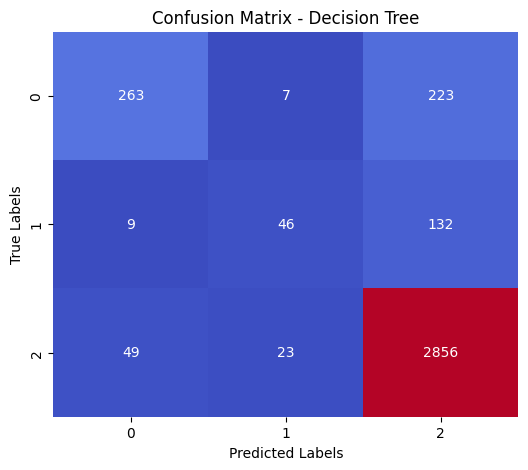

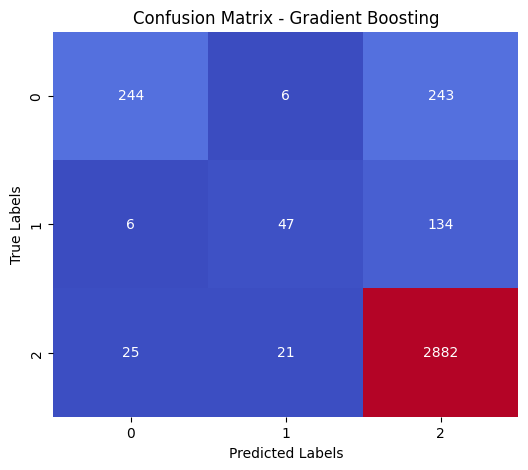

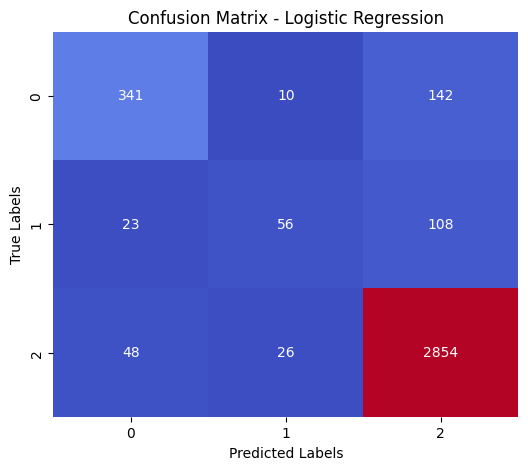

In [ ]:
# Loop through the models, train them, and evaluate them
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_counts, y_train)

    # Make predictions
    y_pred = model.predict(X_test_counts)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', cbar=False)

    # Set plot labels and title
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

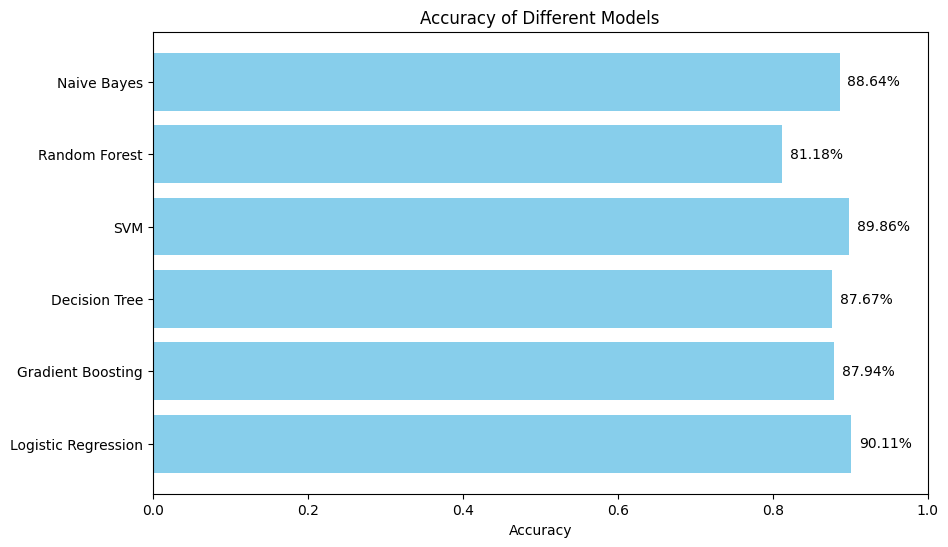

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Dictionary to store accuracy values
accuracies = {}

# Loop through models, train them, and evaluate them
for name, model in models.items():
    # Train the model
    model.fit(X_train_counts, y_train)

    # Make predictions
    y_pred = model.predict(X_test_counts)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Plotting the accuracies of all models
plt.figure(figsize=(10, 6))
bars = plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')

# Add accuracy percentage labels on the bars
for bar in bars:
    width = bar.get_width()  # Get the width (accuracy) of each bar
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f'{width*100:.2f}%',
             va='center', ha='left', fontsize=10, color='black')  # Display percentage

# Set labels and title
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)  # Accuracy range from 0 to 1
plt.gca().invert_yaxis()  # Invert y-axis to show the highest accuracy on top

# Display the plot
plt.show()


In [ ]:
# Example new input
new_text = ["The product quality is very poor and disappointing."]

# Preprocess the new input text using the trained vectorizer
new_text_vectorized = vectorizer.transform(new_text)

# Predict the sentiment using each model
print("Predictions from trained models:")
for model_name, model in models.items():
    predicted_sentiment = model.predict(new_text_vectorized)
    print(f"{model_name} predicts: {predicted_sentiment[0]}")


Predictions from trained models:
Naive Bayes predicts: negative
Random Forest predicts: positive
SVM predicts: negative
Decision Tree predicts: negative
Gradient Boosting predicts: negative
Logistic Regression predicts: negative


**NLP Classification**

In [ ]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [ ]:
# ipython-input-152-025e5f9da290
# Ensure X and y have the same length by re-indexing after creating df_class
df_class = df[(df.Sentiment=='positive') | (df.Sentiment=='negative')]
df_class = df_class.fillna(df_class.mode().iloc[0])

# Reset index to avoid potential issues with mismatched indices
df_class = df_class.reset_index(drop=True)

x = df_class['Summary']
y = df_class['Sentiment']

# Now proceed with train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# ipython-input-149-025e5f9da290
vectorizer = CountVectorizer()
# Fit and transform on X_train, which is now aligned with y_train
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)



In [ ]:
# ipython-input-153-025e5f9da290
nb = MultinomialNB()
# Fit the model with X_train_counts and y_train, now having the same number of samples
nb.fit(X_train_counts, y_train)

MultinomialNB()

In [ ]:
y_preds = nb.predict(X_test_counts) # Changed X_test_count to X_test_counts
accuracy = accuracy_score(y_test, y_preds)
print(" Naive Bayes Accuracy:", accuracy)
print(classification_report(y_test, y_preds))

 Naive Bayes Accuracy: 0.9286130536130536
              precision    recall  f1-score   support

    negative       0.89      0.61      0.72       520
    positive       0.93      0.99      0.96      2912

    accuracy                           0.93      3432
   macro avg       0.91      0.80      0.84      3432
weighted avg       0.93      0.93      0.92      3432



In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_counts, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_preds = rf.predict(X_test_counts)
accuracy = accuracy_score(y_test, y_preds)
print("Random Forest Accuracy:", accuracy)
print(classification_report(y_test, y_preds))

Random Forest Accuracy: 0.8484848484848485
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       520
    positive       0.85      1.00      0.92      2912

    accuracy                           0.85      3432
   macro avg       0.42      0.50      0.46      3432
weighted avg       0.72      0.85      0.78      3432



In [ ]:
# ipython-input-152-025e5f9da290
# Ensure X and y have the same length by re-indexing after creating df_class
df_class = df[(df.Sentiment=='positive') | (df.Sentiment=='negative')]
df_class = df_class.fillna(df_class.mode().iloc[0])

# Reset index to avoid potential issues with mismatched indices
df_class = df_class.reset_index(drop=True)

x = df_class['Review']
y = df_class['Sentiment']

# Now proceed with train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# ipython-input-149-025e5f9da290
vectorizer = CountVectorizer()
# Fit and transform on X_train, which is now aligned with y_train
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [ ]:
nb = MultinomialNB()
# Fit the model with X_train_counts and y_train, now having the same number of samples
nb.fit(X_train_counts, y_train)

MultinomialNB()

Naive Bayes Accuracy: 0.8941241685144125
              precision    recall  f1-score   support

    negative       0.83      0.73      0.78       493
     neutral       0.15      0.04      0.06       187
    positive       0.91      0.98      0.94      2928

    accuracy                           0.89      3608
   macro avg       0.63      0.58      0.59      3608
weighted avg       0.86      0.89      0.88      3608



<Axes: >

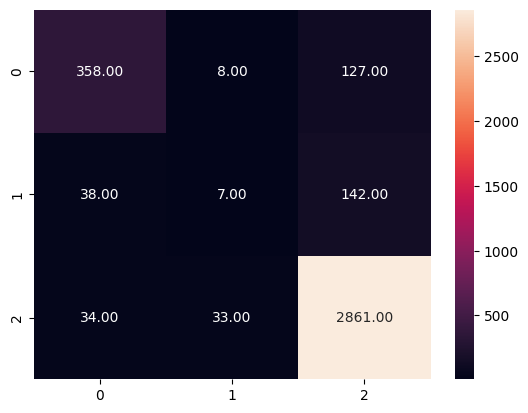

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Example DataFrame
# df1 should have columns 'Review' and 'Label'
# Assuming 'Label' contains the target labels
X = df["Review"]
y = df["Sentiment"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data, transform the test data
X_train_counts = vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_counts = vectorizer.transform(X_test)        # Only transform the test data

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_counts, y_train)

# Predict on the test set
y_preds = nb.predict(X_test_counts)

# Evaluate the model
accuracy = accuracy_score(y_test, y_preds)
print("Naive Bayes Accuracy:", accuracy)
print(classification_report(y_test, y_preds))
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True , fmt='.2f')


**Text Classification**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install nltk
import nltk
import string

# Download the 'punkt' and 'punkt_tab' resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # tokenize text
    tokens = word_tokenize(text.lower())
    # remove punctuation and stop words
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    # re-join filtered tokens into a string
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# apply preprocess function to summary column
df['preprocessed_summary'] = df['Summary'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
cv = CountVectorizer()
bow_summary = cv.fit_transform(df['Summary'])

In [ ]:
y = df['Sentiment']

# Map sentiment labels to numeric classes
class_mapping = {'positive': 0, 'neutral': 1, 'negative': 2}
y = y.map(class_mapping)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bow_summary, y, test_size=0.2, random_state=42)

In [ ]:
nb.fit(X_train,y_train)
pred_tc = nb.predict(X_test)

Accuracy: 0.8835920177383592
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2928
           1       0.48      0.05      0.10       187
           2       0.81      0.63      0.71       493

    accuracy                           0.88      3608
   macro avg       0.73      0.56      0.58      3608
weighted avg       0.86      0.88      0.86      3608



<Axes: >

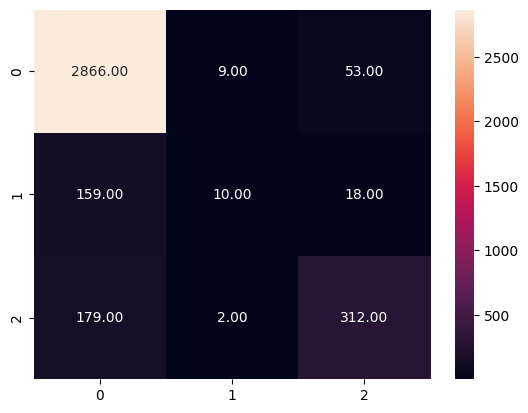

In [ ]:
accuracy = accuracy_score(y_test, pred_tc)
print('Accuracy:', accuracy)
cm = confusion_matrix(y_test, pred_tc)
print(classification_report(y_test, pred_tc))
sns.heatmap(cm, annot=True , fmt='.2f')

Accuracy:  0.905210643015521
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.75      0.79       493
     neutral       0.00      0.00      0.00       187
    positive       0.92      0.99      0.95      2928

    accuracy                           0.91      3608
   macro avg       0.58      0.58      0.58      3608
weighted avg       0.86      0.91      0.88      3608



<Axes: >

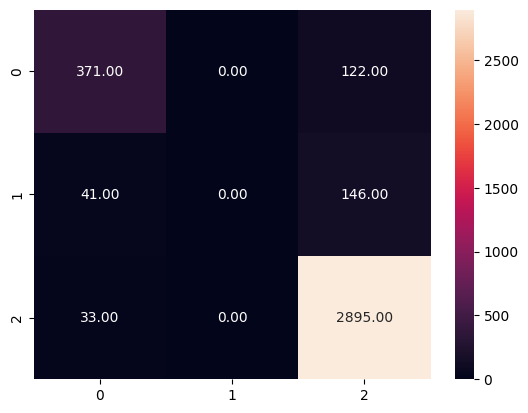

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model
model = SVC()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True , fmt='.2f')

Feature Selection

In [12]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding object type columns


X=df.drop(['words','Sentiment'],axis=1)
y=df['Sentiment']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate through columns and encode object type columns
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

k_best=SelectKBest(score_func=mutual_info_classif,k=60)
X_train_selected=k_best.fit_transform(X_train,y_train)
X_test_selected=k_best.transform(X_test) # Use transform instead of fit for X_test

selected_features_indices=k_best.get_support(indices=True)
print(f'Selected Features indices :{selected_features_indices}')

Selected Features indices :[0 1 2 3 4]


In [13]:
X_train_selected=X_train.iloc[:,selected_features_indices] # Use selected_features_indices
X_test_selected=X_test.iloc[:,selected_features_indices] # Use selected_features_indices

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer

# Assuming df is your DataFrame and 'Summary' is the text column
max_features = 20000  # Set vocabulary size

# 1. Vectorize text data using CountVectorizer
vectorizer = CountVectorizer(max_features=max_features)
X = vectorizer.fit_transform(df['Summary']).toarray() # Fit to 'Summary' column

# 2. Split data after vectorization
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.2, random_state=42)

# ... (Rest of your code for feature selection remains the same)

# 3. Define the LSTM model with input_length matching vectorized data shape
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, input_length=X_train.shape[1])) # input_length set to the number of features
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# ... (Rest of your code for compiling and training the model)
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
history = model.fit(X_train_selected, y_train, epochs=10, batch_size=32, validation_data=(X_test_selected, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize individual models
logistic_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Enable probability for VotingClassifier
naive_bayes = MultinomialNB()
gradient_boost = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Train individual models and evaluate them
models = {
    "Logistic Regression": logistic_reg,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "SVM": svm_model,
    "Naive Bayes": naive_bayes,
    "Gradient Boosting": gradient_boost
}

print("Individual Model Results:")
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_selected, y_train)

    # Predict on the test set
    predictions = model.predict(X_test_selected)

    # Evaluate accuracy and classification report
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, predictions)}")
    print("=" * 50)

# Combine models using VotingClassifier (hard voting as default)
voting_clf = VotingClassifier(
    estimators=[
        ("Logistic Regression", logistic_reg),
        ("Decision Tree", decision_tree),
        ("Random Forest", random_forest),
        ("SVM", svm_model),
        ("Naive Bayes", naive_bayes),
        ("Gradient Boosting", gradient_boost),
    ],
    voting='hard'  # Use 'soft' if you want to consider predicted probabilities
)

# Train the voting ensemble
voting_clf.fit(X_train_selected, y_train)

# Evaluate the ensemble model
voting_predictions = voting_clf.predict(X_test_selected)
voting_accuracy = accuracy_score(y_test, voting_predictions)
print("Voting Classifier Results:")
print(f"Accuracy: {voting_accuracy}")
print(f"Classification Report:\n{classification_report(y_test, voting_predictions)}")


Individual Model Results:
Logistic Regression Accuracy: 0.9123850862005901
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       0.92      0.99      0.95     33348
           2       0.00      0.00      0.00      2095
           3       0.85      0.80      0.82      5566

    accuracy                           0.91     41009
   macro avg       0.59      0.60      0.59     41009
weighted avg       0.86      0.91      0.89     41009

Decision Tree Accuracy: 0.9348923407056987
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97     33348
           2       0.75      0.36      0.49      2095
           3       0.84      0.87      0.86      5566

    accuracy                           0.93     41009
   macro avg       0.85      0.74      0.77     41009
weighted avg       0.93      0.93      0.93     41009

Random Forest Accuracy: 0.931137

In [ ]:
models_70_30 = ['LSTM_70_30', 'LR_70_30', 'DT_70_30', 'RF_70_30']
accuracy_70_30 = [0.8140884921215669,0.8479763240483276,0.838691318275688,0.8822544189147438]

models_80_20 = ['LSTM_80_20', 'LR_80_20', 'DT_80_20', 'RF_80_20']
accuracy_80_20 = [0.8123567003268453,0.8435045611981072, 0.8363578711156642, 0.8818966778867262]

# Combining data
models = models_70_30 + models_80_20
accuracy = accuracy_70_30 + accuracy_80_20

# Assigning colors to each model split
colors_70_30 = ['blue', 'green', 'red', 'purple']
colors_80_20 = ['blue', 'green', 'red', 'purple']
colors = colors_70_30 + colors_80_20

# Define bar width and positions
bar_width = 0.80
index_70_30 = np.arange(len(models_70_30))
index_80_20 = index_70_30 + len(models_70_30) + 1  # Adding a gap between the two groups

# Creating the bar plot
plt.figure(figsize=(10,6))
# Plotting the bars with labels for legend
bars_70_30 = plt.bar(index_70_30, accuracy_70_30, bar_width, color=colors_70_30)
bars_80_20 = plt.bar(index_80_20, accuracy_80_20, bar_width, color=colors_80_20)

# Adding title and labels
plt.title('70%-30% vs 80%-20%')
plt.xlabel('Models and Train-Test Splits')
plt.ylabel('Accuracy')

# Adjusting x-axis labels
plt.xticks(np.concatenate([index_70_30, index_80_20]),
           models_70_30 + models_80_20, rotation=45, ha='right')

# Creating custom legends
legend_labels = ['LSTM', 'LR', 'DT', 'RF']
legend_colors = ['blue', 'green', 'red', 'purple']
legend_handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]
plt.legend(legend_handles, legend_labels, title='Models')

# Showing the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Data
models = ['LSTM', 'Logistic Regression','Decision Tree', 'Random Forest']
accuracy = [0.8123567003268453, 0.8435045611981072, 0.8363578711156642, 0.8818966778867262]
precision = [0.6599234085659198, 0.8236043272296382, 0.8349725357116438, 0.8749840981943073]
recall = [0.8123567003268453, 0.8435045611981072, 0.8363578711156642, 0.8818966778867262]
f1_score = [0.7282489241184227, 0.8133471742197949, 0.835646491811487, 0.835646491811487]

# Example training and validation loss over epochs

# Metrics bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

fig, ax = plt.subplots()
bar_width = 0.2
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, values[i], bar_width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison  80%-20%')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(models)
ax.legend()

plt.show()